# Pipeline for Hydra Muscle Modeling

In [1]:
%load_ext autoreload
%autoreload 2

import sys, os, multiprocessing
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))

#import pandas as pd
import modin.pandas as pd

from hydramuscle.model.smc import SMC
from hydramuscle.model.shell import Shell
from hydramuscle.postprocessing.force_encoder_2d import ForceEncoder2D

from hydramuscle.postprocessing.visualizer.save_video_parallel import *
from hydramuscle.postprocessing.visualizer.vlib import *

In [2]:
TOTAL_TIME = 100
TIME_STEP = 0.0002
PARAM_K2 = 0.1
PARAM_S0 = 400
PARAM_D = 40e-4
PARAM_V7 = 0.01
BEHAVIOR = 'contraction burst'
NUMX = 200
NUMY = 200
SAVE_INTERVAL = 50
STIMS_FAST = [1,3,5,7,9,12,15,18,22,26,31,36,42]
STIMS_SLOW = []

PROJECT = "c_200x200_100s_test_elongation"
NUMX = 200
NUMY = 200
TARGETFPS = 400

## Run the model and save calcium data

In [ ]:
# model = Shell(SMC(T=TOTAL_TIME, 
#                   dt=TIME_STEP, 
#                   k2=PARAM_K2, 
#                   s0=PARAM_S0, 
#                   d=PARAM_D, 
#                   v7=PARAM_V7), 
#               behavior=BEHAVIOR, 
#               numx=NUMX, 
#               numy=NUMY)
# sol = model.run(STIMS_FAST, STIMS_SLOW)
# c = sol[:,0:model.numx*model.numy]
# df = pd.DataFrame(c)
# df.to_csv('/media/hengji/DATA/Data/Documents/hydramuscle/results/data/calcium/'+PROJECT+'.csv', 
#           index = False)

## Or... Read data from the .csv file

In [3]:
SOURCE = "/media/hengji/DATA/Data/Documents/hydramuscle/results/data/calcium/"+PROJECT+".csv"
c = pd.read_csv(SOURCE).values

In [4]:
c.shape

(10001, 40000)

## Save the calcium data as frames and video

In [6]:
if not os.path.exists('/media/hengji/DATA/Data/Documents/hydramuscle/results/animations/'+PROJECT+'/frames/'):
    os.makedirs('/media/hengji/DATA/Data/Documents/hydramuscle/results/animations/'+PROJECT+'/frames/')
    os.makedirs('/media/hengji/DATA/Data/Documents/hydramuscle/results/animations/'+PROJECT+'/movie/')

save_frames(c, PROJECT, NUMX, NUMY)
save_video(PROJECT, TARGETFPS)

The number of CPU is:12
saving frames...
saving img5...
saved 5
saving img2...
saving img4...
saving img1...
saving img0...
saving img3...
saving img6...
saving img9...
saving img7...
saving img8...
saved 2
saved 4
saved 0
saved 6
saved 9
saved 7
saved 8
saved 3
saved 1
saving img16...
saving img19...
saving img15...
saving img11...
saving img10...
saving img14...
saving img13...
saving img17...
saving img12...
saving img18...
saved 16
saved 19
saved 15
saved 12
saved 11
saved 14
saved 10
saved 18
saved 13
saved 17
saving img20...
saving img25...
saving img22...
saving img21...
saving img23...
saving img24...
saving img29...
saving img28...
saving img26...
saving img27...
saved 20
saved 25
saved 29
saved 26
saved 23
saved 22
saved 24
saved 21
saved 28
saved 27
saving img35...
saving img30...
saving img31...
saving img36...
saving img32...
saving img33...
saving img34...
saving img39...
saving img38...
saving img37...
saved 35
saved 30
saved 36
saved 32
saved 34
saved 33
saved 31
saved 

100%|██████████| 10000/10000 [01:02<00:00, 160.63it/s]


## Encode Calcium into Force

In [76]:
from hydramuscle.postprocessing.force_encoder_2d import ForceEncoder2D

ENCODE_INTERVAL = TIME_STEP*SAVE_INTERVAL

force = ForceEncoder2D.encode(c, NUMX, NUMY, ENCODE_INTERVAL)
df = pd.DataFrame(force)
df.to_csv('/media/hengji/DATA/Data/Documents/hydramuscle/results/data/force/'+PROJECT+'.csv')





  0%|          | 0/10001 [00:00<?, ?it/s]



  0%|          | 14/10001 [00:00<01:12, 137.66it/s]



  0%|          | 29/10001 [00:00<01:11, 139.08it/s]



  0%|          | 45/10001 [00:00<01:09, 143.25it/s]



  1%|          | 61/10001 [00:00<01:07, 146.34it/s]



  1%|          | 76/10001 [00:00<01:07, 147.04it/s]



  1%|          | 92/10001 [00:00<01:06, 149.92it/s]



  1%|          | 108/10001 [00:00<01:05, 151.67it/s]



  1%|          | 124/10001 [00:00<01:04, 152.10it/s]



  1%|▏         | 139/10001 [00:00<01:07, 145.79it/s]



  2%|▏         | 155/10001 [00:01<01:05, 149.22it/s]



  2%|▏         | 170/10001 [00:01<01:05, 149.29it/s]



  2%|▏         | 185/10001 [00:01<01:07, 144.82it/s]



  2%|▏         | 200/10001 [00:01<01:08, 142.24it/s]



  2%|▏         | 216/10001 [00:01<01:07, 145.05it/s]



  2%|▏         | 232/10001 [00:01<01:05, 149.03it/s]



  2%|▏         | 247/10001 [00:01<01:05, 148.15it/s]



  3%|▎         | 262/10001 [00:01<01:07, 145.23it/s]



  3%|

In [77]:
force.shape

(10001, 40000)

## Visualize specified frames

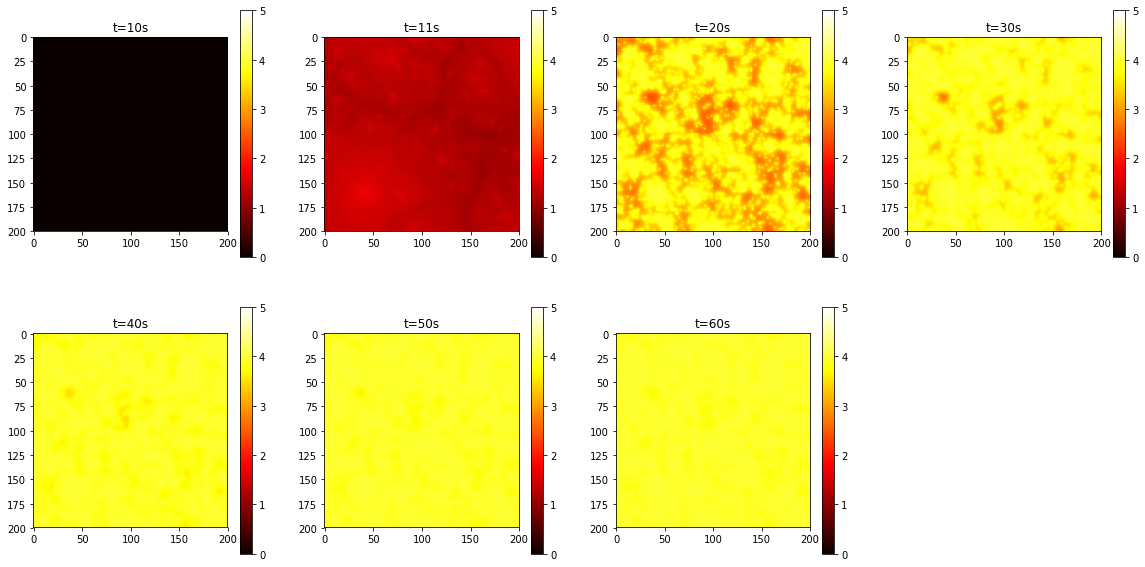

In [85]:
# TIME_LIST = [t+0.1 for t in STIMS_FAST[:8]]
TIME_LIST = [10, 11, 20, 30, 40, 50, 60]
plot_frames(force, NUMX, NUMY, TIME_LIST, TIME_STEP*SAVE_INTERVAL, 0, 5)

## Visualize the trace of specified points

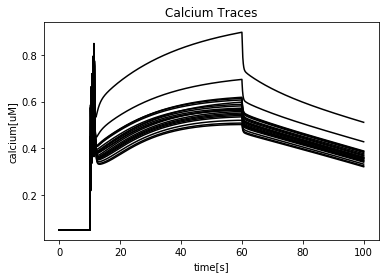

In [87]:
I_X = 0
I_Y = 10

index = I_X*NUMX + I_Y
save_curve(x=c[:,9990:10010],
           dt=TIME_STEP*SAVE_INTERVAL,
           xlabel="time[s]",
           ylabel="calcium[uM]",
           title="Calcium Traces",
           filename=None,
           show=True, 
           save=False)

## Visualize the average trace over time

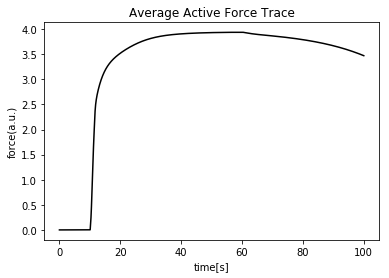

In [89]:
save_curve(x=np.mean(force, axis=1),
           dt=TIME_STEP*SAVE_INTERVAL,
           xlabel="time[s]",
           ylabel="force(a.u.)",
           title="Average Active Force Trace",
           filename=None,
           show=True, 
           save=False)